David Giacobbi, CPSC 322, Fall 2023, Notebook for HW-4

# 1. Load libraries and datasets

 Import the data table and utility functions.

In [42]:
from data_table import *
from data_util import *

Load the cleaned auto data.

In [43]:
auto = DataTable(['mpg','cyls','disp','hp','weight','accl','year','origin','name','msrp'])
auto.load('auto-clean.txt')

Print the first 15 rows of the combined table.

In [44]:
auto.rows(range(15))

  mpg    cyls    disp    hp    weight    accl    year    origin  name                                msrp
-----  ------  ------  ----  --------  ------  ------  --------  --------------------------------  ------
 18         8     307   130      3504    12        70         1  chevrolet chevelle malibu           2881
 15         8     350   165      3693    11.5      70         1  buick skylark 320                   2847
 18         8     318   150      3436    11        70         1  plymouth satellite                  2831
 16         8     304   150      3433    12        70         1  amc rebel sst                       3166
 17         8     302   140      3449    10.5      70         1  ford torino                         2778
 15         8     429   198      4341    10        70         1  ford galaxie 500                    3137
 14         8     454   220      4354     9        70         1  chevrolet impala                    3132
 14         8     440   215      4312     8.5 

# 2. Data Visualization

## Histograms

Histogram for MPG

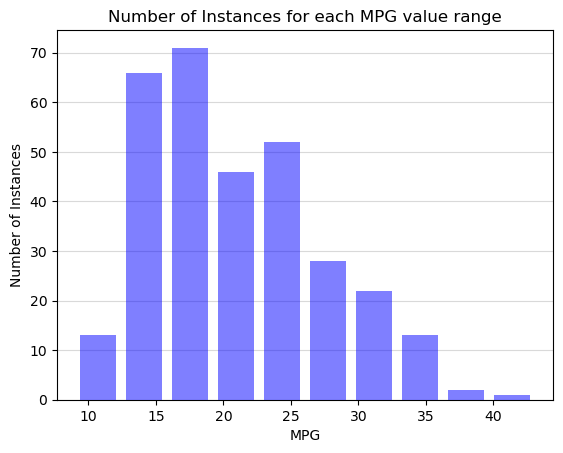

In [45]:
# example for mpg
histogram(auto, 'mpg', 10, 'MPG', 'Number of Instances', 'Number of Instances for each MPG value range')

Histogram for Displacement

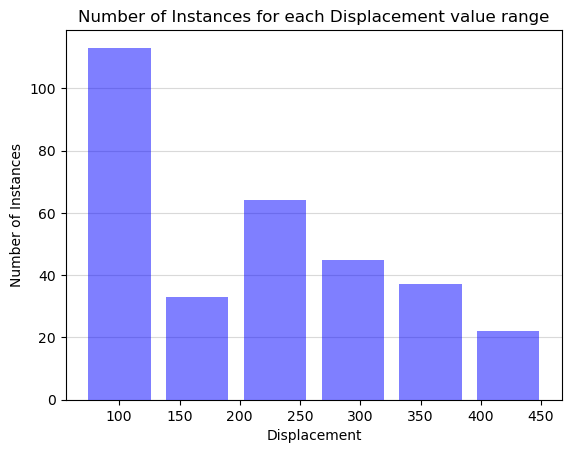

In [46]:
histogram(auto, 'disp', 6, 'Displacement', 'Number of Instances', 'Number of Instances for each Displacement value range')

Histogram for Horsepower

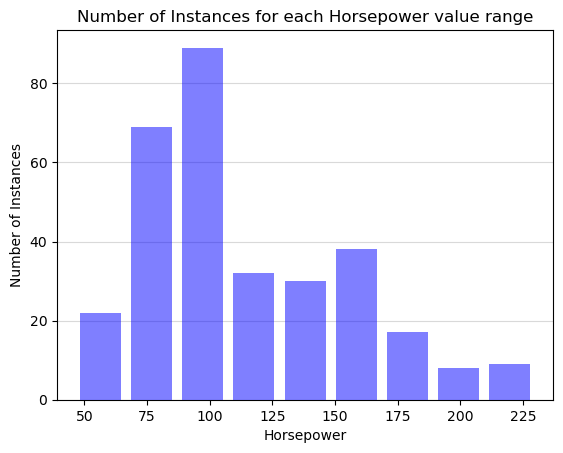

In [47]:
histogram(auto, 'hp', 9, 'Horsepower', 'Number of Instances', 'Number of Instances for each Horsepower value range')

Histogram for Weight

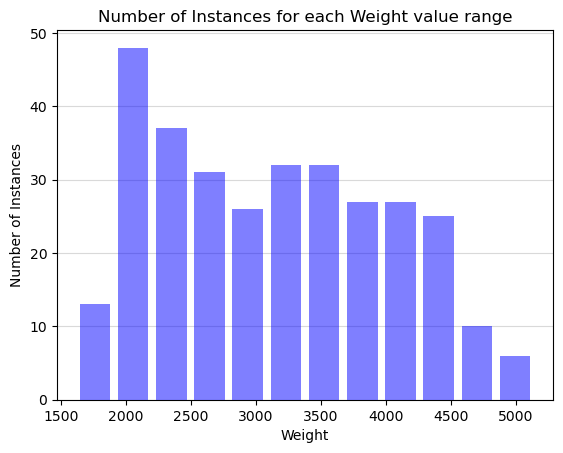

In [48]:
histogram(auto, 'weight', 12, 'Weight', 'Number of Instances', 'Number of Instances for each Weight value range')

Histogram for Acceleration

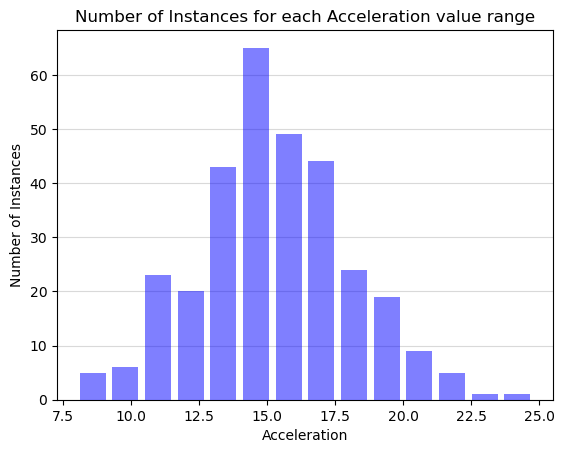

In [49]:
histogram(auto, 'accl', 14, 'Acceleration', 'Number of Instances', 'Number of Instances for each Acceleration value range')

Histogram for MSRP

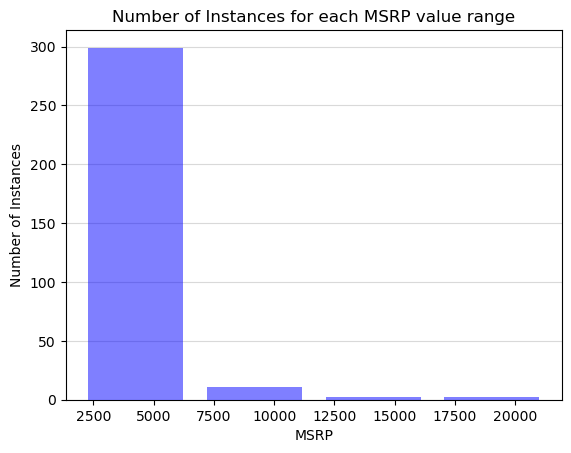

In [50]:
histogram(auto, 'msrp', 4, 'MSRP', 'Number of Instances', 'Number of Instances for each MSRP value range')

## Histograms with "Standard" Bins

*TODO: Using the example from class for MPG, create a histogram with the "standardized" DOE rating bins for MPG. Note you will need to use a bar chart function from HW-3 to display the bins (as opposed to our histogram function in HW-4's data_util.py). Also, using one of the other continuous values (msrp, acceleration, weight, horespower, displacement) create your own "standard" bin ranges and use them to create the corresponding histogram (again via a bar chart). Be sure to use data_util's frequency_of_range() function as part of creating the corresponding bar charts.* 

DOE Rating Histogram for MPG

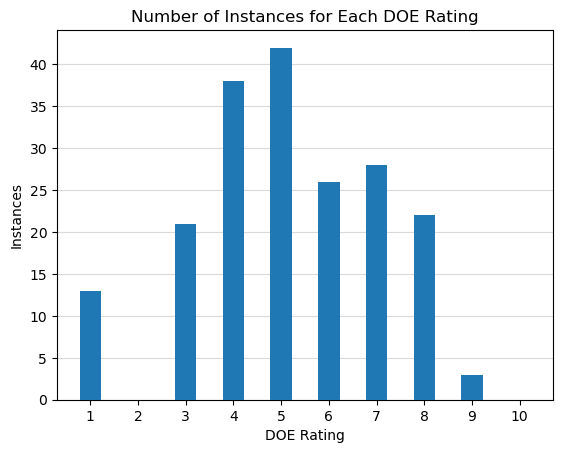

In [51]:
bar_values = [frequency_of_range(auto, 'mpg', 0, 13), frequency_of_range(auto, 'mpg', 14, 14), frequency_of_range(auto, 'mpg', 15, 16), frequency_of_range(auto, 'mpg', 17, 19),
              frequency_of_range(auto, 'mpg', 20, 23), frequency_of_range(auto, 'mpg', 24, 26), frequency_of_range(auto, 'mpg', 27, 30), frequency_of_range(auto, 'mpg', 31, 36),
              frequency_of_range(auto, 'mpg', 37, 44), frequency_of_range(auto, 'mpg', 45, 99999)]

bar_chart(bar_values, [i for i in range(1, 11)], 'DOE Rating', 'Instances', 'Number of Instances for Each DOE Rating')

Another Contiguous Value Histogram: Weight Class for Car

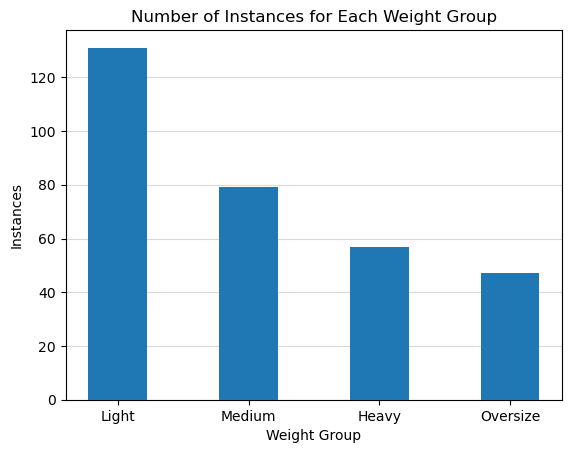

In [52]:
bar_values = [frequency_of_range(auto, 'weight', 0, 2800), frequency_of_range(auto, 'weight', 2800, 3600), 
              frequency_of_range(auto, 'weight', 3600, 4200), frequency_of_range(auto, 'weight', 4200, 9999999)]

bar_chart(bar_values, ['Light', 'Medium', 'Heavy', 'Oversize'], 'Weight Group', 'Instances', 'Number of Instances for Each Weight Group')

## Scatter Plots with Best Fit Lines

MPG vs MSRP

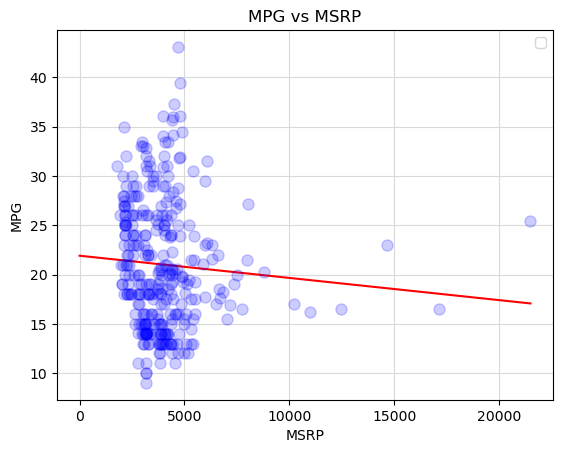

R = -0.07


In [53]:
# example
scatter_plot_with_best_fit(auto, 'msrp', 'mpg', 'MSRP', 'MPG', 'MPG vs MSRP')
print("R =", round(correlation_coefficient(auto, 'msrp', 'mpg'), 2))

MPG vs Displacement

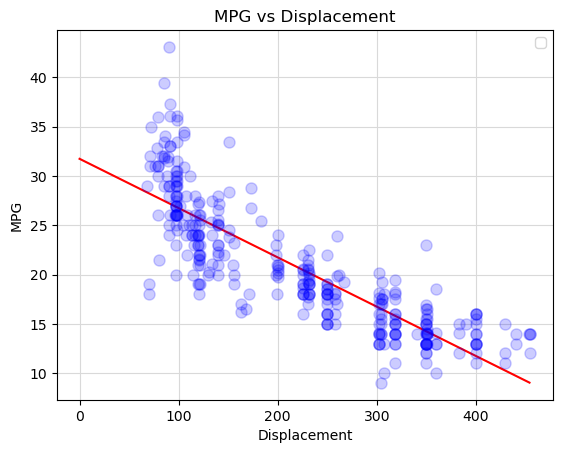

R = -0.84


In [54]:
scatter_plot_with_best_fit(auto, 'disp', 'mpg', 'Displacement', 'MPG', 'MPG vs Displacement')
print("R =", round(correlation_coefficient(auto, 'disp', 'mpg'), 2))

MPG vs Horsepower

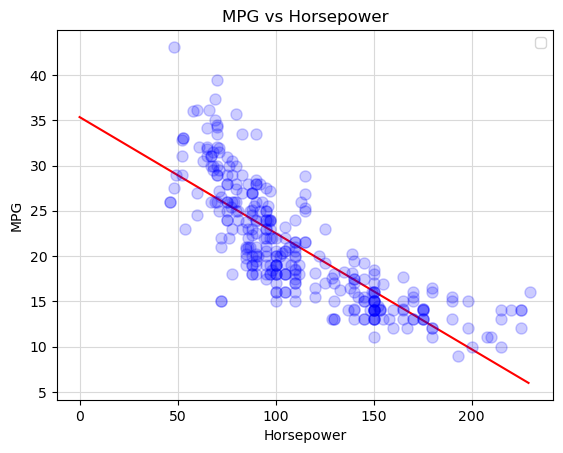

R = -0.8


In [55]:
scatter_plot_with_best_fit(auto, 'hp', 'mpg', 'Horsepower', 'MPG', 'MPG vs Horsepower')
print("R =", round(correlation_coefficient(auto, 'hp', 'mpg'), 2))

MPG vs Weight

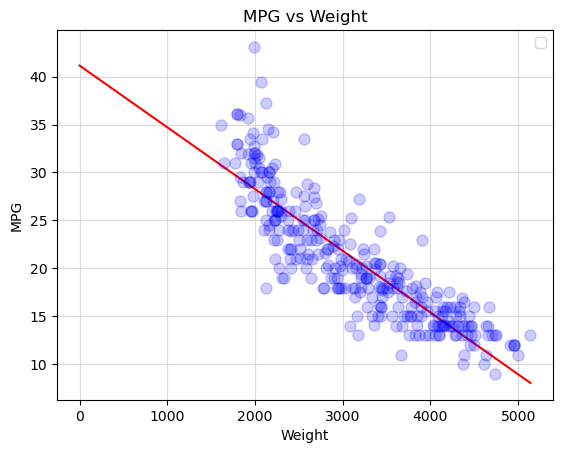

R = -0.87


In [56]:
scatter_plot_with_best_fit(auto, 'weight', 'mpg', 'Weight', 'MPG', 'MPG vs Weight')
print("R =", round(correlation_coefficient(auto, 'weight', 'mpg'), 2))

MPG vs Acceleration

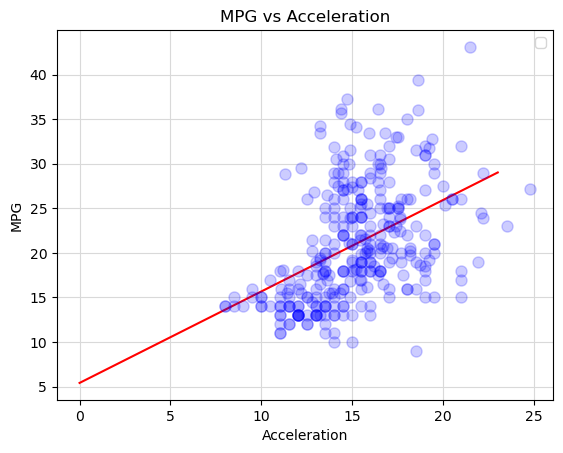

R = 0.45


In [57]:
scatter_plot_with_best_fit(auto, 'accl', 'mpg', 'Acceleration', 'MPG', 'MPG vs Acceleration')
print("R =", round(correlation_coefficient(auto, 'accl', 'mpg'), 2))

# 3. Basic Predictive Analytics with Linear Regression

Pick one of the continuous attributes (price, horespower, acceleration, weight, or displacement) that you think will best predict MPG (e.g., based on the scatter plots in Section 2).

The best regression relationship was displayed in MPG vs Weight. Ideally this makes the most sense as heavier cars require more fuel to move in comparison to lighter cars. Therefore, we will be predicting values on this regression line and testing its error utilizing functions written in HW-4.

Get the corresponding linear regression "best fit" line (i.e., the slope and intercept values).

In [58]:
m, b = linear_regression(auto, 'weight', 'mpg')

print("Slope:", m)
print("Intercept:", b)
print(f"Regression Equation: y = {m}x + {b}")

Slope: -0.006442100735106266
Intercept: 41.15463538598284
Regression Equation: y = -0.006442100735106266x + 41.15463538598284


Select 5 rows random rows from the auto dataset. 

In [59]:
rand_rows = [auto[288], auto[28], auto[143], auto[7], auto[81]]
for val in rand_rows:
    print(val, "\n\n")

  mpg    cyls    disp    hp    weight    accl    year    origin  name                msrp
-----  ------  ------  ----  --------  ------  ------  --------  ----------------  ------
 20.2       6     232    90      3265    18.2      79         1  amc concord dl 6    4324 


  mpg    cyls    disp    hp    weight    accl    year    origin  name        msrp
-----  ------  ------  ----  --------  ------  ------  --------  --------  ------
   25       4     104    95      2375    17.5      70         2  saab 99e    2170 


  mpg    cyls    disp    hp    weight    accl    year    origin  name                         msrp
-----  ------  ------  ----  --------  ------  ------  --------  -------------------------  ------
   14       8     318   150      4457    13.5      74         1  dodge coronet custom (sw)    3882 


  mpg    cyls    disp    hp    weight    accl    year    origin  name                 msrp
-----  ------  ------  ----  --------  ------  ------  --------  -----------------  ---

Display the predicted MPG value for each of the five rows using the best-fit (linear regression) line. 

In [60]:
expected_list = []
predicted_list = []

print('--------- Predicted MPG ---------\n')
for val in rand_rows:
    print("Expected:", val['mpg'])
    expected_list.append(val['mpg'])

    print("Predicted:", m*val['weight'] + b, "\n")
    predicted_list.append(m*val['weight'] + b)

--------- Predicted MPG ---------

Expected: 20.2
Predicted: 20.121176485860886 

Expected: 25.0
Predicted: 25.854646140105462 

Expected: 14.0
Predicted: 12.442192409614215 

Expected: 14.0
Predicted: 13.376297016204624 

Expected: 14.0
Predicted: 14.890190688954597 



Calculate the standard error of the predictions (versus the actual MPG values for those rows) and display the result.

In [61]:
summation_sq = 0
for i in range(5):
    summation_sq = summation_sq + ((expected_list[i] - predicted_list[i]) ** 2)

std_error = sqrt(summation_sq / 5)
print("Standard Error:", std_error)

Standard Error: 0.9321848029804696


# 4. Issues, Challenges, and Observations

Although I did not run into many issues with this homework assignment, I did have some trouble distinguishing various formulas when writing the data_util file. Given their close similarity, I found the summations difficult to keep track of. Other than that, this assignment went fairly smooth in its completion. In the case of the weight of the car, it is fairly accurate classifier in predicting the MPG of each car. This is due to the close correlation coefficient that the two attributes have with each other, ultimately allowing me to guess nearly perfectly to the nearest ones place. In addition to the weight, it is apparent that the horsepower of a car also has a significant relationship with MPG. Given these relationship, these three attributes could be grouped together, if a part of a much larger data model. Though not perfect, linear regression was proven to be helpful for almost half of the attributes vs MPG visualized.